In [4]:
import numpy as np
import matplotlib.pyplot as plt


(100,)
(10,)
0.01 0.09090909090909091


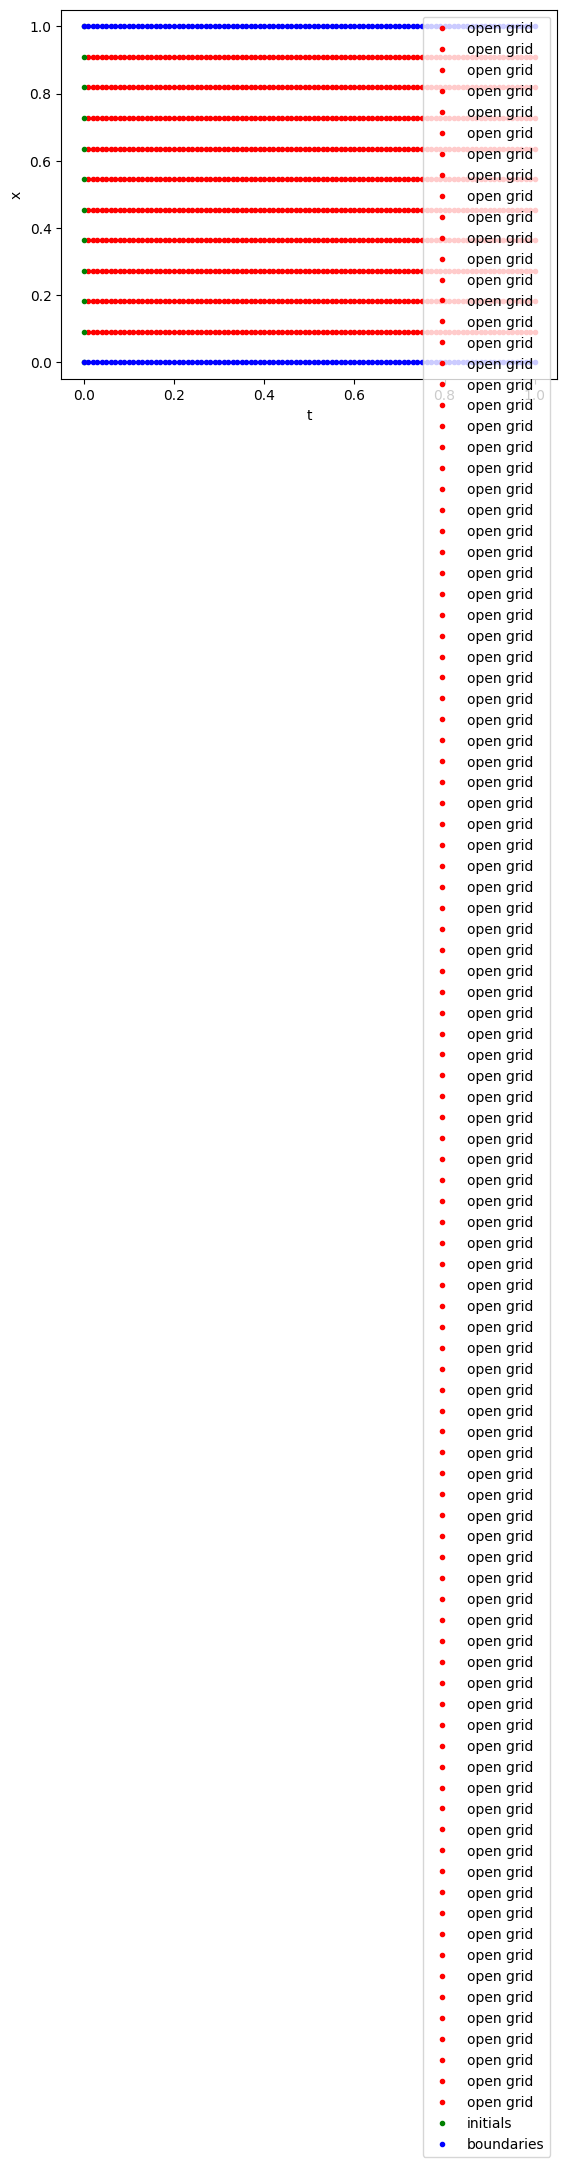

In [17]:
N = 10 # Number of spatial gridpoints (N+2)
a = 0; b = 1 # G-open (open domain of u)
h = (b-a)/(N+1) # Spatial step
x = np.linspace(a,b,num=N+2)
x_v = x[1:-1]

M = 100 # Number of time-steps (M+1)
T = 1 # J-open (open time domain of u)
k = T/M # Time step
t = np.linspace(0,T,num=M+1)
t_v = t[1:]

print(t_v.shape)
print(x_v.shape)
print(k,h)

t_mesh,x_mesh = np.meshgrid(t,x)
t_mesh_v,x_mesh_v = t_mesh[1:-1,1:],x_mesh[1:-1,1:]
plt.plot(t_mesh_v,x_mesh_v,'r.',label="open grid")
plt.plot(t_mesh[:,0],x_mesh[:,0],'g.',label="initials")
plt.plot(t_mesh[0,:],x_mesh[0,:],'b.',label="boundaries")
plt.plot(t_mesh[-1,:],x_mesh[-1,:],'b.')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

### Heat equation

$$\partial_t u - \partial_{xx}u = f$$

in discrete form, one has

$$\begin{cases}
\varepsilon^m_i = \theta f^{m+1}_i + (1-\theta) f^m_i, && i=1,\dots,N,\, m=0,...,M-1, \\ 
u^0_i = u_{0,i}, && i = 1,\dots N, \\
u^m_i = 0, && i \in \{0, N+1\}, \, m=0,\dots,M
\end{cases}$$

Note that for $u$ to be in $C^{1,2}(\bar{J} \times \bar{G};\mathbb{R})$ one requires $f\in C(\bar{J}\times \bar{G};\mathbb{R})$ as the minimal assumption


In [18]:
def f(m,x_v):
    """Any f with the assumptions above"""
    return np.zeros_like(x_v)

def u_0(x_v):
    return np.sin(np.pi/2 * x_v)



In [19]:
G = h**(-2)*(np.diag([2]*N)+np.diag([-1]*(N-1),k=1)+np.diag([-1]*(N-1),k=-1))

def solver(theta,x_v,t_v):
    N,M = len(x_v),len(t_v)
    u_init = u_0(x_v)  # needs to be on the same form as u, (the initial condition)
    B = (G*theta*k+np.identity(N))
    
    print(np.linalg.cond(B))
    B_inv = np.linalg.pinv(B)
    C = -(G*(1-theta)*k-np.identity(N))
    u = np.zeros(shape=(N+2,M+1)) # boundaries are not filled

    print("ok")
    for m in range(M):
        if m%(M/10) == 0:
            print(f"Progress {(m/M)*100}%")
        if m == 0:
            u_m = u_init
            u[1:-1,m] = u_m
        else:
            u_m = u[1:-1,m]

        F_m = (theta*f(t_v[m],x_v)+(1-theta)*f(t_v[m-1],x_v))

        u[1:-1,m+1] = B_inv@(k*F_m + C@u_m)

    return u

u = solver(1,x_v,t_v)
print(u.shape)
print((u[0,:] == np.zeros(M+1)) & (u[N+1,:] == np.zeros(M+1))) # Boundary condition
print(u[1:-1,0] == u_0(x_v)) # Initial condition


5.229354994001801
ok
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
(12, 101)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]


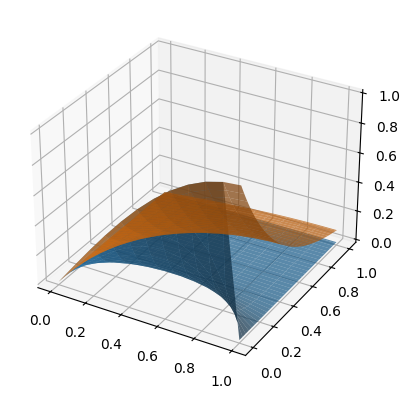

In [20]:
def true_u(x,t):
    return np.exp(-(np.pi**2/4)*t)*np.sin(np.pi*x*0.5)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(np.meshgrid(x,t)[0],np.meshgrid(x,t)[1], np.abs(true_u(np.meshgrid(x,t)[0],np.meshgrid(x,t)[1])-u.T),alpha=0.7)
ax.plot_surface(np.meshgrid(x,t)[0],np.meshgrid(x,t)[1], u.T,alpha=0.7)


# plt.show()

# fig2 = plt.figure()

# ax2 = fig2.add_subplot(111, projection='3d')

ax.plot_surface(np.meshgrid(x,t)[0],np.meshgrid(x,t)[1],true_u(np.meshgrid(x,t)[0],np.meshgrid(x,t)[1]),alpha=0.7)
plt.show()
